<a href="https://colab.research.google.com/github/user23e/Seguridad-Informatica-Deber1/blob/main/Part_II-Practical_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part II: Practical Exercises**

## **Exercise 1: Caesar Cipher Analysis**

Given the following ciphertext encrypted with a Caesar cipher:

```
Al osk lzw twkl gx laewk, al osk lzw ogjkl gx laewk, al osk lzw syw gx oakvge,
al osk lzw syw gx xggdakzfwkk, al osk lzw whguz gx twdawx, al osk lzw whguz gx
afujwvmdalq, al osk lzw kwskgf gx Dayzl, al osk lzw kwskgf gx Vsjcfwkk, al osk
lzw khjafy gx zghw, al osk lzw oaflwj gx vwkhsaj, ow zsv wnwjqlzafy twxgjw mk,
ow zsv fglzafy twxgjw mk, ow owjw sdd ygafy vajwul lg Zwsnwf, ow owjw sdd ygafy
vajwul lzw glzwj osq...
```

**Tasks:**
*   **a)** Decrypt the message using frequency analysis (show your work)
*   **b)** What is the key used?

## **Solución:**

El Caesar Cipher Analysis es un método para descubrir el texto original cuando se ha usado el cifrado de César, un sistema de sustitución simple donde cada letra se reemplaza por otra desplazada un número fijo de posiciones en el alfabeto (la clave o key). El análisis se puede hacer de dos formas principales: (1) por fuerza bruta, probando las 26 posibles claves hasta que aparece un texto con sentido, y (2) mediante análisis de frecuencias, que consiste en comparar las frecuencias de letras del texto cifrado con las frecuencias típicas del idioma (por ejemplo, en inglés la “e” es la más común, seguida de “t”, “a”, etc.). Gracias a esta comparación, es posible determinar la clave utilizada, ya que la distribución de frecuencias no cambia en su forma, sino que está “desplazada” un número constante de posiciones. A continuación se muestra una tabla con las frecuencias típicas del idioma inglés:

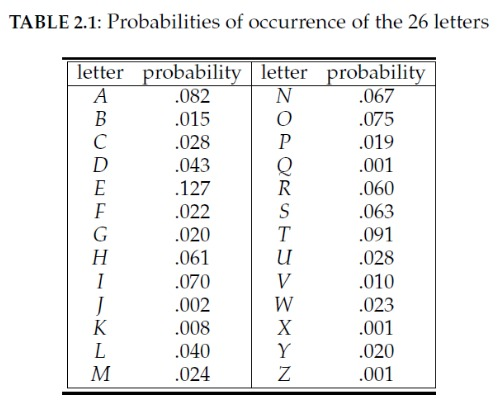

En el código inferior, este análisis se refleja en dos procesos. Primero, la función *caesar_decrypt* recibe como entrada el texto cifrado y una clave (key) candidata, y aplica el desplazamiento inverso para recuperar el posible texto del plaintext. Esto se hace restando la clave al valor numérico de cada letra y aplicando la operación módulo 26, de forma que, si se sobrepasa el inicio del alfabeto, se continúa desde la letra “z”. Matemáticamente, el descifrado se expresa como $P = (C - K) \mod 26$, donde $C$ es la letra del ciphertext, $K$ es la clave y $P$ es la letra del plaintext.

Una vez obtenido ese texto candidato, entra en juego la función *chi_squared_score*, que realiza el análisis de frecuencias: cuenta cuántas veces aparece cada letra en el texto descifrado y compara esa distribución con la frecuencia típica del inglés (las frecuencias en esta parte no están redondeadas como en la imagen). El resultado es un valor numérico que indica qué tan probable es que el texto generado corresponda al idioma real. Al repetir este procedimiento para todas las posibles claves (de 0 a 25), el programa elige la clave que produce la mejor coincidencia estadística, mostrando como salida el mensaje descifrado más cercano al original. A continuación se puede observar el proceso realizado:

In [ ]:
import string
from collections import Counter

# --- Texto cifrado ---
ciphertext = """Al osk lzw twkl gx laewk, al osk lzw ogjkl gx laewk, al osk lzw syw gx oakvge,
al osk lzw syw gx xggdakzfwkk, al osk lzw whguz gx twdawx, al osk lzw whguz gx
afujwvmdalq, al osk lzw kwskgf gx Dayzl, al osk lzw kwskgf gx Vsjcfwkk, al osk
lzw khjafy gx zghw, al osk lzw oaflwj gx vwkhsaj, ow zsv wnwjqlzafy twxgjw mk,
ow zsv fglzafy twxgjw mk, ow owjw sdd ygafy vajwul lg Zwsnwf, ow owjw sdd ygafy
vajwul lzw glzwj osq..."""

# --- Frecuencias de letras en inglés ---
english_freq = {
    'a': 0.08167, 'b': 0.01492, 'c': 0.02782, 'd': 0.04253, 'e': 0.12702,
    'f': 0.02228, 'g': 0.02015, 'h': 0.06094, 'i': 0.06966, 'j': 0.00153,
    'k': 0.00772, 'l': 0.04025, 'm': 0.02406, 'n': 0.06749, 'o': 0.07507,
    'p': 0.01929, 'q': 0.00095, 'r': 0.05987, 's': 0.06327, 't': 0.09056,
    'u': 0.02758, 'v': 0.00978, 'w': 0.02360, 'x': 0.00150, 'y': 0.01974,
    'z': 0.00074
}

# --- Función para descifrar ---
def caesar_decrypt(text, key):
    result = []
    for ch in text:
        if ch.isalpha():
            base = 'A' if ch.isupper() else 'a'
            offset = (ord(ch) - ord(base) - key) % 26
            result.append(chr(ord(base) + offset))
        else:
            result.append(ch)
    return "".join(result)

# --- Función para calcular Chi-cuadrado ---
def chi_squared_score(text):
    text = text.lower()
    letters = [c for c in text if c.isalpha()]
    N = len(letters)
    counts = Counter(letters)
    chi2 = 0.0
    for ch in string.ascii_lowercase:
        observed = counts.get(ch, 0)
        expected = english_freq[ch] * N
        chi2 += (observed - expected) ** 2 / (expected if expected > 0 else 1)
    return chi2

# --- Probar todos los valores de key ---
best_key = None
best_score = float("inf")
best_plain = ""

for key in range(26):
    candidate = caesar_decrypt(ciphertext, key)
    score = chi_squared_score(candidate)
    if score < best_score:
        best_score = score
        best_key = key
        best_plain = candidate

print("\n a) Texto descifrado:\n")
print(best_plain)

print(f"\n b) Mejor key usada: {best_key}")



 a) Texto descifrado:

It was the best of times, it was the worst of times, it was the age of wisdom,
it was the age of foolishness, it was the epoch of belief, it was the epoch of
incredulity, it was the season of Light, it was the season of Darkness, it was
the spring of hope, it was the winter of despair, we had everything before us,
we had nothing before us, we were all going direct to Heaven, we were all going
direct the other way...

 b) Mejor key usada: 18


## **Exercise 2: Affine Cipher Implementation**

The Affine cipher uses the formula: $E(x) = (ax + b) \mod 26$

Given: $Plaintext = CRYPTOGRAPHY$, $a = 5, b = 8$

**Tasks:**

*   **a)** Encrypt the plaintext (show calculations for first 3 letters)
*   **b)** Find the decryption key values (multiplicative inverse of a)
*   **c)** Verify your encryption by decrypting the first 3 letters
*   **d)** How many valid keys exist for the Affine cipher? Explain your reasoning.

## **Solución:**

Para resolver el literal **a)**, en donde se debe encriptar el $Plaintext = CRYPTOGRAPGY$, lo primero que se realizará, es tomar en cuenta la siguiente convención:

*   A = 0
*   B = 1
*   C = 2
*   D = 3
*   E = 4
*   F = 5
*   G = 6
*   H = 7
*   I = 8
*   J = 9
*   K = 10
*   L = 11
*   M = 12
*   N = 13
*   O = 14
*   P = 15
*   Q = 16
*   R = 17
*   S = 18
*   T = 19
*   U = 20
*   V = 21
*   W = 22
*   X = 23
*   Y = 24
*   Z = 25

Desde este punto, para las **primeras 3 letra**s del $Plaintext = CRYPTOGRAPHY$ podemos observar que $C = 2$, $R = 17$ y $Y = 24$. Estos valores serían los correspondientes a $x$ en la fórmula: $E(x) = (ax + b) \mod 26$, donde $a = 5$ y $b = 8$. Al obtener todos los valores numéricos de las variables de la fórmula, se procede a sustituirlos para así obtener la letra cifrada de cada letra del plaintext. A continuación se puede observar los cálculos:

1.   Para C (x = 2):

$E(2) = (5*2 + 8) \mod 26 = (18 \mod 26) = 18 = S$

2.   Para R (x = 17):

$E(17) = (5*17 + 8) \mod 26 = (93 \mod 26) = 15 = P$

3.   Para Y (x = 24):

$E(24) = (5*24 + 8) \mod 26 = (128 \mod 26) = 24 = Y$

Por lo tanto, las **primeras 3 letras cifradas** son **"S P Y"**. Siguiendo esta misma lógica, al cifrar toda la palabra $CRYPTOGRAPHY$ obtenemos que el cifrado completo es $SPYFZAMPIFRY$ como se observa en el código inferior:



In [ ]:
def letter_to_num(letter):
    return ord(letter.upper()) - ord('A')

def num_to_letter(num):
    return chr(num + ord('A'))

def affine_encrypt(plaintext, a, b):
    ciphertext = ''
    for letter in plaintext:
        if letter.isalpha():
            x = letter_to_num(letter)
            y = (a * x + b) % 26
            ciphertext += num_to_letter(y)
        else:
            ciphertext += letter
    return ciphertext

# === Literal a) ===
plaintext = "CRYPTOGRAPHY"
a = 5
b = 8

ciphertext = affine_encrypt(plaintext, a, b)
print("a) Texto cifrado completo:", ciphertext)


a) Texto cifrado completo: SPYFZAMPIFRY


Para resolver el literal **b)** se utiliza la fórmula general del descifrado en el cifrado afín: $D(y) = a^{-1} (y - b) \pmod{26}$

En este caso, la incógnita es el valor de $(a^{-1})$, ya que $b = 8$ y $(y)$ depende de la letra cifrada. Desde este punto, para obtener $(a^{-1})$ se realiza lo siguiente:

1. El inverso multiplicativo de $(a)$ es el número que cumple:

$
a * a^{-1} \equiv 1 \pmod{26}
$

Es decir:
$
5 * a^{-1} \equiv 1 \pmod{26}
$

2. Aplicando el **algoritmo de Euclides extendido**, se obtiene:

$
26 = 5 * 5 + 1 \quad \Rightarrow \quad 1 = 26 - 5 * 5
$

De esta igualdad se deduce que el inverso multiplicativo de $(a)$ es $(-5)$, lo cual significa que:

$
a^{-1} = -5 \pmod{26}
$

3. Ajustando el valor al rango positivo:

$
-5 + 26 = 21
$

Por lo tanto:
$
a^{-1} = 21
$

**Finalmente**, sustituyendo este valor en la fórmula de descifrado se obtiene:

$
D(y) = 21 \cdot (y - 8) \pmod{26}
$
, donde los valores de la clave de descifrado son: $(a^{-1}) = 21$ y $b=8$.


In [ ]:
# Algoritmo de Euclides extendido
def egcd(a, b):
    if a == 0:
        return b, 0, 1
    gcd, x1, y1 = egcd(b % a, a)
    x = y1 - (b // a) * x1
    y = x1
    return gcd, x, y

# Inverso multiplicativo usando Euclides extendido
def mod_inverse(a, m):
    gcd, x, y = egcd(a, m)
    if gcd != 1:
        return None  # No existe inverso si no son coprimos
    else:
        return x % m

# === Literal b) ===
a = 5
b = 8
a_inv = mod_inverse(a, 26)

print("b) Clave de descifrado:")
print(f"a = {a}, inverso multiplicativo a^-1 = {a_inv}")
print(f"Fórmula de descifrado: D(y) = {a_inv} * (y - {b}) mod 26")

b) Clave de descifrado:
a = 5, inverso multiplicativo a^-1 = 21
Fórmula de descifrado: D(y) = 21 * (y - 8) mod 26


En contraste, para resolver el literal **c)**, en donde se debe descifrar el $Ciphertext = SPYFZAMPIFRY$, lo primero que se realizará, es tomar en cuenta  nuevamente la convención.

Desde este punto, para las **primeras 3 letras** del $Ciphertext = SPYFZAMPIFRY$ podemos observar que $S = 18$, $P = 15$ y $Y = 24$. Estos valores serían los correspondientes a $y$ en la fórmula: $D(y) = a^{-1} (y - b) \mod 26$, donde $(a^{-1}) = 21$ y $b = 8$. Al obtener todos los valores numéricos de las variables de la fórmula, se procede a sustituirlos para así obtener la letra descifrada de cada letra del ciphertext. A continuación se puede observar los cálculos:

1.   Para S (y = 18):

$D(18) = 21 * (18 - 8) \mod 26 = (210 \mod 26) = 2 = C$

2.   Para P (y = 15):

$D(15) = 21 * (15 - 8) \mod 26 = (147 \mod 26) = 17 = R$

3.   Para Y (y = 24):

$D(24) = 21 * (24 - 8) \mod 26 = (336 \mod 26) = 24 = Y$

Por lo tanto, las **primeras 3 letras descifradas** son **"C R Y"**. Siguiendo esta misma lógica, al descifrar toda la palabra $SPYFZAMPIFRY$ obtenemos que el descifrado completo es $CRYPTOGRAPHY$ como se observa en el código inferior:



In [ ]:
def letter_to_num(letter):
    return ord(letter.upper()) - ord('A')

def num_to_letter(num):
    return chr(num + ord('A'))

def mod_inverse(a, m):
    for i in range(1, m):
        if (a * i) % m == 1:
            return i
    return None

def affine_decrypt(ciphertext, a, b):
    a_inv = mod_inverse(a, 26)
    plaintext = ''
    for letter in ciphertext:
        if letter.isalpha():
            y = letter_to_num(letter)
            x = (a_inv * (y - b)) % 26
            plaintext += num_to_letter(x)
        else:
            plaintext += letter
    return plaintext

# === Literal c) ===
ciphertext = "SPYFZAMPIFRY"  # obtenido del literal a
a = 5
b = 8
a_inv = mod_inverse(a, 26)

print("c) Texto descifrado completo:", affine_decrypt(ciphertext, a, b))


c) Texto descifrado completo: CRYPTOGRAPHY


Para finalizar, para resolver el literal **d)**, se debe entender que en el cifrado afín existen **312 claves válidas** cuando se trabaja con el alfabeto inglés. Esto se debe a que la clave está formada por dos números, $(a)$ y $(b)$.  

- Para que el sistema sea reversible, $(a)$ debe ser **coprimo con 26**, es decir, que no comparta divisores comunes con 26 salvo el 1.  
- Entre los números del 1 al 25, existen **12 valores posibles para $(a)$**: 1, 3, 5, 7, 9, 11, 15, 17, 19, 21, 23 y 25.  
- El valor $(b)$ puede tomar **cualquier número entre 0 y 25**, lo que corresponde a 26 posibilidades.  

Por lo tanto, el total de claves posibles se calcula como: $12 * 26 = 312$

Desde este punto, hay **312 pares (a, b)** que se pueden usar como claves en el cifrado afín. Esta misma lógica se puede observar en el código inferior:


In [ ]:
from math import gcd

def is_valid_a(a):
    return gcd(a, 26) == 1

# === Literal d) ===
valid_a = [i for i in range(1, 26) if is_valid_a(i)]
num_valid_keys = len(valid_a) * 26

print("d) Número de claves válidas para el cifrado afin:")
print(f"Valores de (a) válidos (coprimos con 26): {valid_a}")
print("Valores posibles de (b): 0..25 (26 valores)")
print(f"Número total de claves válidas: {num_valid_keys}")

d) Número de claves válidas para el cifrado afin:
Valores de (a) válidos (coprimos con 26): [1, 3, 5, 7, 9, 11, 15, 17, 19, 21, 23, 25]
Valores posibles de (b): 0..25 (26 valores)
Número total de claves válidas: 312


## **Exercise 3: Perfect Secrecy Analysis**

Consider a simple cipher that operates on single bits where:

- Key space: {0, 1}
- Plaintext space: {0, 1}
- Encryption: $(C = P \oplus K)$ (XOR operation)
- Each key is chosen with probability 1/2

**Tasks:**

*   **a)** Create the complete encryption matrix showing all possible (plaintext, key, ciphertext) combinations
*   **b)** Calculate $P(C=0)$ and $P(C=1)$
*   **c)** Calculate $P(P=0|C=0)$ and $P(P=1|C=0)$
*   **d)** Does this cipher achieve perfect secrecy? Prove your answer using Shannon's definition
*   **e)** What happens to perfect secrecy if we reuse the key for multiple bits?


## **Solución**

Para resolver el literal **a)**, se construye la tabla de encriptación considerando todas las combinaciones posibles de $P$, $K$ y $C$, aplicando la operación XOR:

$
C = P \oplus K
$

La matriz queda:

\begin{array}{c|c|c}
P & K & C = P \oplus K \\
\hline
0 & 0 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0 \\
\end{array}

Esta misma lógica se puede observar en el código inferior:

In [ ]:
print("a) Matriz de encriptación XOR (P, K, C)")

for P in [0, 1]:
    for K in [0, 1]:
        C = P ^ K  # XOR
        print(f"P={P}, K={K}, C={C}")

a) Matriz de encriptación XOR (P, K, C)
P=0, K=0, C=0
P=0, K=1, C=1
P=1, K=0, C=1
P=1, K=1, C=0


Para resolver el literal **b)**, se calculan las probabilidades de los ciphertexts utilizando la ley de la probabilidad total.

* La probabilidad de que $C=0$ es:

$
P(C=0) = P(P=0) * P(C=0) + P(P=1) * P(C=0)=
\tfrac12*\tfrac12 + \tfrac12*\tfrac12 = \tfrac12
$

* Por complemento:

$
P(C=1) = 1 - P(C=0) = \tfrac12
$

De esta manera, ambos valores de $C$ son igualmente probables.

En el código inferior, se puede observar esta misma lógica:

In [ ]:
from collections import Counter

print("b) Cálculo de P(C=0) y P(C=1)")

# Todas las combinaciones de (P,K) son equiprobables
cases = [(P, K, P ^ K) for P in [0, 1] for K in [0, 1]]
counts = Counter([C for (_, _, C) in cases])

total = len(cases)
P_C0 = counts[0] / total
P_C1 = counts[1] / total

print(f"P(C=0) = {P_C0}")
print(f"P(C=1) = {P_C1}")


b) Cálculo de P(C=0) y P(C=1)
P(C=0) = 0.5
P(C=1) = 0.5


Para resolver el literal **c)**, se utiliza la fórmula de Bayes para calcular la probabilidad del plaintext dado un ciphertext.

1. Para obtener $P(P=0 \mid C=0)$ se realiza lo siguiente:

$
P(P=0 \mid C=0) = \frac{P(C=0 \mid P=0) * P(P=0)}{P(C=0)}
$

Como $P(C=0 \mid P=0)=\tfrac12$, $P(P=0)=\tfrac12$ y $P(C=0)=\tfrac12$, entonces:

$
P(P=0 \mid C=0) = \frac{\tfrac12 * \tfrac12}{\tfrac12} = \tfrac12
$

2. De manera similar:

$
P(P=1 \mid C=0) = \tfrac12
$

Esto significa que observar $C=0$ no cambia las probabilidades del plaintext.

A continuación se puede observar esta misma idea en el código inferior:

In [ ]:
print("c) Cálculo de probabilidades condicionales")

# Contar frecuencia de pares (P,C)
pairs = [(P, P ^ K) for P in [0, 1] for K in [0, 1]]

# Filtrar solo los casos donde C=0
cond_C0 = [P for (P, C) in pairs if C == 0]
total_C0 = len(cond_C0)

P_P0_given_C0 = cond_C0.count(0) / total_C0
P_P1_given_C0 = cond_C0.count(1) / total_C0

print(f"P(P=0 | C=0) = {P_P0_given_C0}")
print(f"P(P=1 | C=0) = {P_P1_given_C0}")


c) Cálculo de probabilidades condicionales
P(P=0 | C=0) = 0.5
P(P=1 | C=0) = 0.5


Para resolver el literal **d)**, se debe aplicar la definición de secreto perfecto de Shannon, que establece que un cifrado es perfecto si:

$
P(P=p \mid C=c) = P(P=p) \quad \forall p, c
$

* En este caso, dado que la clave es uniforme y $C=P\oplus K$, se cumple que:

$
P(C=c \mid P=p) = P(K = p \oplus c) = \tfrac12
$

* Además:

$
P(C=c) = \sum_{p'} P(P=p') * \tfrac12 = \tfrac12
$

* Al aplicar Bayes:

$
P(P=p \mid C=c) = \frac{\tfrac12 * P(P=p)}{\tfrac12} = P(P=p)
$

Esto demuestra que el esquema cumple con secreto perfecto siempre que la clave se use una sola vez.

Esta misma lógica se puede observar en el código inferior:

In [ ]:
print("d) Verificación de secreto perfecto")

# Distribución a priori de P (uniforme)
P_prior = {0: 0.5, 1: 0.5}

# Calcular posterior P(P=p | C=c)
def posterior(p, c):
    # P(C=c | P=p) = 0.5 porque la clave es uniforme
    return (0.5 * P_prior[p]) / 0.5

for c in [0, 1]:
    for p in [0, 1]:
        print(f"P(P={p} | C={c}) = {posterior(p, c)} (vs P(P={p})={P_prior[p]})")


d) Verificación de secreto perfecto
P(P=0 | C=0) = 0.5 (vs P(P=0)=0.5)
P(P=1 | C=0) = 0.5 (vs P(P=1)=0.5)
P(P=0 | C=1) = 0.5 (vs P(P=0)=0.5)
P(P=1 | C=1) = 0.5 (vs P(P=1)=0.5)


Para resolver el literal **e)**, se analiza qué ocurre al reutilizar la misma clave en varios bits.

* Si se usan dos mensajes $P_1$ y $P_2$ con la misma clave $K$:

$
C_1 = P_1 \oplus K, \qquad C_2 = P_2 \oplus K
$

* Un atacante puede calcular:

$
C_1 \oplus C_2 = (P_1 \oplus K) \oplus (P_2 \oplus K) = P_1 \oplus P_2
$

De esta manera se revela la relación entre los dos plaintexts, lo que rompe la propiedad de secreto perfecto. Por lo tanto, el esquema sólo es seguro si cada clave se usa una sola vez.

A continuación esta lógica se puede observar en el código inferior:

In [ ]:
print("e) Reutilización de clave en dos bits")

# Ejemplo con dos plaintexts
P1, P2 = 1, 0
K = 1  # misma clave para ambos

C1 = P1 ^ K
C2 = P2 ^ K

print(f"P1={P1}, P2={P2}, K={K}")
print(f"C1={C1}, C2={C2}")

# Un atacante calcula:
XOR_plaintexts = C1 ^ C2
print(f"C1 ^ C2 = {XOR_plaintexts} = P1 ^ P2")


e) Reutilización de clave en dos bits
P1=1, P2=0, K=1
C1=0, C2=1
C1 ^ C2 = 1 = P1 ^ P2


## **Exercise 4: Entropy and Key Analysis**

Consider the following scenarios:

**Scenario A: A password system where:**

- Passwords are exactly 4 characters long
- Each character is chosen uniformly from {A, B, C, D}

**Scenario B: A Vigenère cipher with:**

- Key length = 3
- Each key character chosen uniformly from 26-letter alphabet

**Tasks:**

*   **a)** Calculate the entropy (in bits) for Scenario A
*   **b)** Calculate the entropy (in bits) for Scenario B
*   **c)** If an attacker can test 1000 keys per second, how long would it take to break each system in the worst case?
*   **d)** Calculate the "unicity distance" concept: If English text has entropy ≈ 1.5 bits per character, how much ciphertext would theoretically be needed to uniquely determine a 3-character Vigenère key?

## **Solución:**

Para resolver el literal **a)**, se debe calcular la entropía del sistema de contraseñas.  

* La entropía general de Shannon se define como:  

$
H(X) = - \sum_i P(x_i) \log_2 P(x_i)
$

* En un sistema de claves donde todas las combinaciones son **equiprobables**, la probabilidad de cada clave es:  

$
P(x_i) = \frac{1}{R^L}
$

siendo $R$ el número de símbolos posibles y $L$ la longitud de la clave.  

* Al sustituir en la fórmula, se obtiene:  

$
H(K) = \log_2(R^L)
$

* En este caso, $R = 4$ y $L = 4$, por lo que:  

$
H(K) = \log_2(4^4) = \log_2(256) = 8 \ \text{bits}
$

Por lo tanto, la entropía del **Escenario A** es de **8 bits**.  

A continuación se puede observar esta misma idea en el código inferior:

In [ ]:
import math

def entropy_passwords(R, L):
    # Calcula la entropía con la fórmula: H (K) = log2(R^L)
    return math.log2(R**L)

# Escenario A: contraseñas de 4 caracteres, alfabeto {A,B,C,D}
R_a = 4
L_a = 4
entropy_a = entropy_passwords(R_a, L_a)

print(f"a) La entropía del Escenario A es {entropy_a:.2f} bits")


a) La entropía del Escenario A es 8.00 bits


Para resolver el literal **b)**, se aplica la misma deducción.  

* Con equiprobabilidad, la fórmula es:  

$
H(K) = \log_2(R^L)
$

* En este escenario, el alfabeto es de $R = 26$ letras y la longitud de la clave es $L = 3$.  

* Al aplicar la fórmula se obtiene:  

$
H(K) = \log_2(26^3) = \log_2(17\,576) \approx 14.10 \ \text{bits}
$

Por lo tanto, la entropía del **Escenario B** es de aproximadamente **14.10 bits**.

A continuación se puede observar esta misma idea en el código inferior:

In [ ]:
import math

def entropy_passwords(R, L):
    return math.log2(R**L)

# Escenario B: clave de 3 caracteres, alfabeto de 26 letras
R_b = 26
L_b = 3
entropy_b = entropy_passwords(R_b, L_b)

print(f"b) La entropía de la clave de Vigenère es {entropy_b:.2f} bits")


b) La entropía de la clave de Vigenère es 14.10 bits


En el literal **c)**, se solicita calcular el tiempo que tardaría un atacante en romper el sistema en el peor de los casos, probando 1000 claves por segundo.  

* El número total de claves posibles se obtiene como:  

$
N = R^L
$

* El tiempo de fuerza bruta se calcula con:  

$
T = \frac{N}{\text{pruebas/seg}}
$

* Para el escenario A, el número total de claves es:  

$
N = 4^4 = 256 \quad \Rightarrow \quad T = \frac{256}{1000} = 0.256 \ \text{segundos}
$

* Para el escenario B, el número total de claves posibles es:  

$
N = 26^3 = 17\,576 \quad \Rightarrow \quad T = \frac{17\,576}{1000} \approx 17.6 \ \text{segundos}
$

Esta misma lógica se puede observar en el código inferior:

In [ ]:
import math

def brute_force_time(R, L, speed):
    """
    Calcula el tiempo máximo para probar todas las claves (peor caso).
    R = tamaño del alfabeto
    L = longitud
    speed = claves por segundo que prueba el atacante
    """
    total_keys = R**L
    return total_keys / speed

speed = 1000  # claves por segundo

# Escenario A
R_a, L_a = 4, 4
time_a = brute_force_time(R_a, L_a, speed)

# Escenario B
R_b, L_b = 26, 3
time_b = brute_force_time(R_b, L_b, speed)

print(f"c) Tiempo en el peor caso - Escenario A: {time_a:.3f} segundos")
print(f"c) Tiempo en el peor caso - Escenario B: {time_b:.3f} segundos")


c) Tiempo en el peor caso - Escenario A: 0.256 segundos
c) Tiempo en el peor caso - Escenario B: 17.576 segundos


Con respecto al literal **d)**, se debe aplicar el concepto de **distancia de unicidad**, el cual se define como la cantidad mínima de texto cifrado necesaria para identificar de manera única la clave.  

* La fórmula general es:  

$
U = \frac{H(K)}{D}
$
, donde $H(K)$ es la entropía de la clave y $D$ es la **redundancia del lenguaje**.

* La redundancia del lenguaje, es calculada como:  

$
D = \log_2(|\Sigma|) - H_L
$
, donde $|\Sigma|$ es el tamaño del alfabeto y $H_L$ es la entropía real por símbolo del lenguaje.  

* En este caso, $H(K) \approx 14.10 \ \text{bits}$ y la redundancia es $D =  \log_2(26) - 1.5 \approx 3.20 \text{ bits/caracter}$. Al dividir se obtiene:  

$
U = \frac{14.10}{3.20} \approx 4.4
$

Esto indica que teóricamente serían necesarios alrededor de **5 caracteres de texto cifrado** para determinar de manera única la clave.

Esta misma lógica se puede observar en el código inferior:

In [ ]:
import math

def unicity_distance(HK, D):
    """
    Calcula la distancia de unicidad: U = H(K) / Redundancia
    HK = entropía de la clave (bits)
    D = redundancia del idioma (bits/char)
    """
    return HK / D

# Entropía de la clave (del literal b)
HK = math.log2(26**3)  # ≈ 14.10 bits
H_language = 1.5       # entropía del inglés ≈ 1.5 bits/char
D_redundancy = math.log2(26) - H_language

U = unicity_distance(HK, D_redundancy)

print(f"d) La distancia de unicidad es ≈ {U:.2f} caracteres (≈ 5 caracteres)")


d) La distancia de unicidad es ≈ 4.41 caracteres (≈ 5 caracteres)
